C:\Users\rkesh\AppData\Local\Temp\ipykernel_3684\2881162721.py:45: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided))


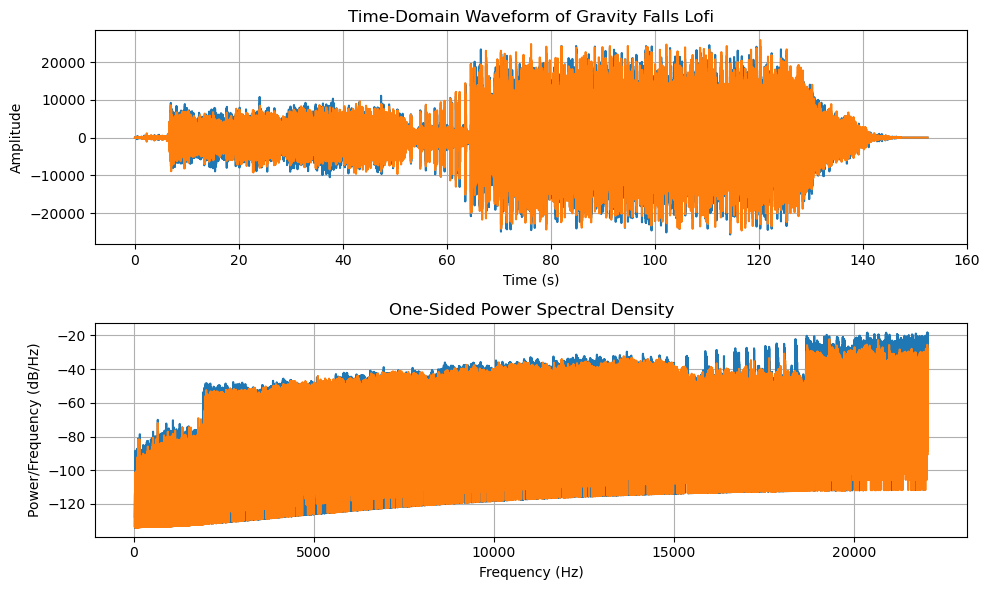

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the WAV file
sample_rate, audio_data = wavfile.read(r"Brad Breeck - Gravity Falls Main Title Theme (From Lofi_ Gravity FallsVisualizer Video).wav")

# Define the length of the audio data (number of samples)
num_samples = len(audio_data)

# Define the duration of the audio data in seconds
duration = num_samples / sample_rate

# Generate a time axis for plotting
time_axis = np.linspace(0, duration, num_samples)

# Apply windowing to each channel
window = np.hamming(num_samples)
audio_data_windowed = np.zeros_like(audio_data, dtype=np.float64)
for i in range(audio_data.shape[1]):  # Loop over each channel
    audio_data_windowed[:, i] = audio_data[:, i] * window

# Compute the Fourier transform
fourier_transform = np.fft.fft(audio_data_windowed)
freqs = np.fft.fftfreq(num_samples, d=1/sample_rate)

# Compute the one-sided power spectral density (PSD)
psd = (2 * np.abs(fourier_transform) ** 2) / (sample_rate * num_samples)

# Extract the one-sided PSD and frequencies (discard negative frequencies)
psd_one_sided = psd[:num_samples//2]
freqs_one_sided = freqs[:num_samples//2]

# Plot the time-domain waveform
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, audio_data)
plt.title("Time-Domain Waveform of Gravity Falls Lofi")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the one-sided power spectral density (PSD)
plt.subplot(2, 1, 2)
plt.plot(freqs_one_sided, 10 * np.log10(psd_one_sided))
plt.title('One-Sided Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()
